In [179]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from ellipse import LsqEllipse
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from skimage import io
import matplotlib.pyplot as plt
import math
import pickle
import statistics
from statistics import mean
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
import pickle

In [180]:
%matplotlib inline
import matplotlib.pyplot as plt
import os

import seaborn as sns
import DSH
from DSH import Kernel
from DSH import MIfile as MI
from DSH import CorrMaps as CM

In [181]:
import speckle
from speckle.inference.read_in_data import *
from speckle.inference.correlation_heatmap import *
from speckle.inference.calculating_tau import *
from speckle.inference.dedrift import *

In [182]:
def compute_g2t_wo_kernel(px,laglist_g2t):
    intensity=[]
    for t in range(0,img.shape[0],1):
        intensity.append(img[t][px[0],px[1]])
        
    g2t=[]
    for lag in laglist_g2t:
        numerator_sum=0
        denumerator_sum_1=0
        denumerator_sum_2=0
        max_t_range=len(intensity)-lag
        for t in range(0,max_t_range,1):
            numerator_sum=numerator_sum+int(intensity[t])*int(intensity[t+lag])
            denumerator_sum_1=denumerator_sum_1+int(intensity[t])
            denumerator_sum_2=denumerator_sum_2+int(intensity[t+lag])
        numerator=numerator_sum/max_t_range
        denumerator_1=denumerator_sum_1/max_t_range
        denumerator_2=denumerator_sum_2/max_t_range
        g2t.append((numerator/denumerator_1/denumerator_2)-1)
    return g2t

In [183]:
w=7
h=7
omega=w*h
matrix=np.zeros((w,h))
for i in range(0,w):
    for j in range(0,h):
        matrix[i][j]=1/omega

In [184]:
def compute_intensity(px, matrix, img):
    intensity=[]
    for t in range(0,img.shape[0],1):
        kerneled_intensity=0
        start_y=px[0]-math.floor(matrix.shape[0]/2)
        start_x=px[1]-math.floor(matrix.shape[1]/2)
        for y_i in range(0,matrix.shape[1],1):
            for x_i in range(0,matrix.shape[1],1):
                y_pixel=start_y+y_i
                x_pixel=start_x+x_i
                kerneled_intensity=kerneled_intensity+matrix[y_i,x_i]*img[t][y_pixel,x_pixel]
        intensity_t=kerneled_intensity
        intensity.append(intensity_t)

#     plt.figure(figsize=(8,5))
#     #plt.ylim([0, 255])
#     plt.plot(range(0,img.shape[0],1),intensity,'-')
#     plt.legend(['Intensity vs Time'], fontsize=18)
#     plt.xlabel("Time [s]",fontsize=18)
#     plt.ylabel("Intensity",fontsize=18)
    
    return intensity

In [185]:
def compute_g2t(px,laglist_g2t, matrix):
    intensity=compute_intensity(px, matrix, img)
    g2t=[]
    for lag in laglist_g2t:
        numerator_sum=0
        denumerator_sum_1=0
        denumerator_sum_2=0
        max_t_range=img.shape[0]-lag
        for t in range(0,max_t_range,1):
            numerator_sum=numerator_sum+int(intensity[t])*int(intensity[t+lag])
            denumerator_sum_1=denumerator_sum_1+int(intensity[t])
            denumerator_sum_2=denumerator_sum_2+int(intensity[t+lag])
        numerator=numerator_sum/max_t_range
        denumerator_1=denumerator_sum_1/max_t_range
        denumerator_2=denumerator_sum_2/max_t_range
        g2t.append((numerator/denumerator_1/denumerator_2)-1)
    return g2t, intensity

# 10xobjective 0.26au HS gel ground glass 1avg

In [366]:
video_time_length=60 #s
imgname='10x_HSgel_405laser_0p26au_1000umheight_722gain17plaser_1min_1avg'
foldername='/Users/wenyun/Desktop/20221017/'

In [367]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]
framespeed=video_time_length/frame_number

In [368]:
laglist_g2t=range(0,5,1)
averaged_g2t=[]
for y in range(299,301,1):
    for x in range(121,124,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)

In [369]:
average_g2t=np.mean(averaged_g2t,axis=0)
average_g2t=average_g2t/average_g2t[0]
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [164]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

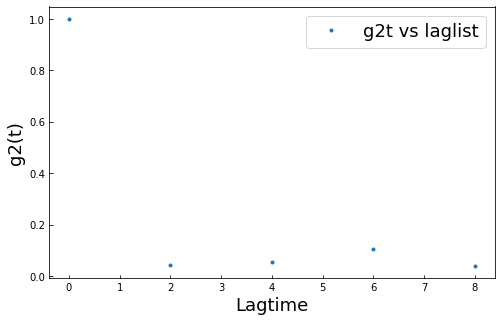

In [165]:
plt.figure(figsize=(8,5))
plt.plot(lagtime_g2t[0:50],average_g2t[0:50],'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Lagtime",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

In [258]:
laglist_g2t=range(0,10,1)
px=[252,161] #[y,x]
g2t,intensity=compute_g2t(px,laglist_g2t,matrix)

Text(0, 0.5, 'g2(t)')

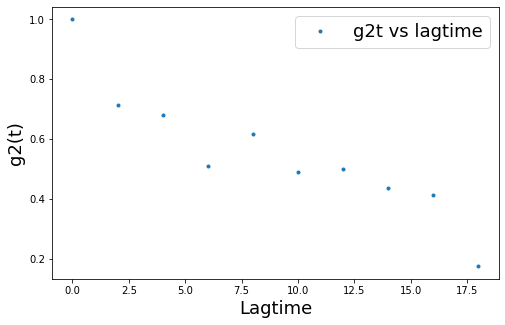

In [259]:
plt.figure(figsize=(8,5))
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plt.plot(lagtime_g2t,np.array(g2t)/g2t[0],'.')
plt.legend(['g2t vs lagtime'], fontsize=18)
plt.xlabel("Lagtime",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
#plt.xlim([0,lagtime_g2t[-1]])

## DSH

In [217]:
%cd /Users/wenyun/Desktop/python/DSHpy-master 

# 2. install the project/module
!python setup.py install

# 3. Add the project directory to the path
import os, sys

sys.path.append(os.getcwd())

/Users/wenyun/Desktop/python/DSHpy-master
running install
/Users/wenyun/opt/anaconda3/lib/python3.8/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/Users/wenyun/opt/anaconda3/lib/python3.8/site-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running bdist_egg
running egg_info
writing DSH.egg-info/PKG-INFO
writing dependency_links to DSH.egg-info/dependency_links.txt
writing requirements to DSH.egg-info/requires.txt
writing top-level names to DSH.egg-info/top_level.txt
reading manifest file 'DSH.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'DSH.egg-info/SOURCES.txt'
installing library code to build/bdist.macosx-10.9-x86_64/egg
running install_lib
running build_py
creating build/bdist.macosx-10.9-

In [370]:
#info
kernel_size=10
laglist=list(range(1,10,1))
#test_ROI = [x,y,w,h]
testROI=None
tRange=None

In [371]:
## don't change please
def set_up_kernel(kernel_size):
    KernelSpecs = DSH.Kernel.Kernel()
    KernelSpecs.Initialize(shape=kernel_size, kernel_type='Gauss', params={'sigma':[kernel_size, kernel_size]}, padding=True)
    return KernelSpecs

def compute_correlation_maps(foldername, imgname, kernel, laglist, testROI=None, tRange=None):
    froot = os.path.join(foldername)
    fname = os.path.join(froot, imgname+'.raw')
    metadata_fname = os.path.join(froot, imgname+'.ini')
    
    mi_file = MI.MIfile(fname, metadata_fname)
    mi_file.OpenForReading()
    mi_file.Read(zRange=None, cropROI=None, closeAfter=False)
    mi_file.Close()
    
    position=str(testROI)+'_'+str(tRange)
    froot = os.path.join(foldername+imgname+'_'+position)
    #KernelSpecs.SetPadding(False)
    corrmap = CM.CorrMaps(mi_file, froot, laglist, kernel, imgRange=tRange, cropROI=testROI)
    
    cmap_list = corrmap.Compute(silent=False, return_maps=False)
    
def load_correlation_maps(foldername,imgname,testROI, tRange):
    froot = os.path.join(foldername+imgname+'_'+str(testROI)+'_'+str(tRange))
    corr_maps = CM.LoadFromConfig(os.path.join(froot, 'CorrMapsConfig.ini'), outFolder=froot)
    return corr_maps

In [372]:
kernel=set_up_kernel(kernel_size)
kernel_matrix=kernel.ToMatrix()

In [373]:
compute_correlation_maps(foldername, imgname, kernel, laglist, testROI, tRange)

Computing correlation maps:
  STEP 1: Loading images and computing average intensity...
  STEP 2: Computing contrast...
  STEP 3: Computing correlations...
     ...lag 1
     ...lag 2
     ...lag 3
     ...lag 4
     ...lag 5
     ...lag 6
     ...lag 7
     ...lag 8
     ...lag 9
Procedure completed in 28.2 seconds!


In [374]:
corr_maps=load_correlation_maps(foldername,imgname,testROI, tRange)

In [375]:
loadtRange_tau = [0,20,1]
t_range_tau=range(0,20,1)
laglist_tau=list(range(1,10,1))
lagtime_tau= [element * framespeed for element in laglist_tau]

In [381]:
def single_pixel_decay(y,x):
    correlation_value=avg_correlation_single_px(corr_maps,[y,x],loadtRange_tau,t_range_tau,laglist_tau, laglist)
    plt.figure()
    plt.plot(laglist_tau,correlation_value,'.')

In [382]:
def avg_correlation_single_px(corr_maps,px,loadtRange,load_t_Range, laglist_fx,laglist_global): #return seconds
    px_corrmap=corr_maps.GetCorrTimetrace(px,zRange=loadtRange)
    average_tau=[]
    for tau in laglist_fx:
        tauidx=laglist_global.index(tau)+1
        sum=0
        for t in range(len(load_t_Range)):
            sum=sum+px_corrmap[tauidx,t]
        px_tau=sum/len(load_t_Range)
        average_tau.append(px_tau)
    return average_tau

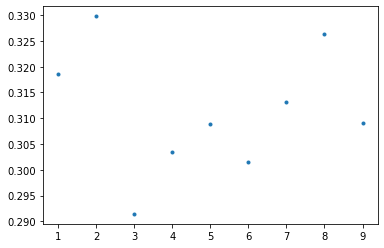

In [390]:
y=254
x=139
single_pixel_decay(y,x)

# 10xobjective 0.26au HS gel ground glass 8avg

In [269]:
video_time_length=60 #s
imgname='10x_HSgel_405laser_0p26au_1000umheight_722gain17plaser_1min_8avg'
foldername='/Users/wenyun/Desktop/20221017/'

In [149]:
# read the image stack
img = io.imread(foldername+imgname+'.tif')
frame_number=img.shape[0]
img_height=img.shape[1]
img_width=img.shape[2]
framespeed=video_time_length/frame_number

In [150]:
laglist_g2t=range(0,5,1)
averaged_g2t=[]
for y in range(141,142,1):
    for x in range(99,100,1):
        px=[y,x]
        g2t=compute_g2t_wo_kernel(px,laglist_g2t)
        averaged_g2t.append(g2t)

In [151]:
average_g2t=np.mean(averaged_g2t,axis=0)
print(average_g2t)

[ 0.00612599  0.0002801  -0.00278934 -0.0021768   0.00118473]


In [152]:
average_g2t=np.mean(averaged_g2t,axis=0)
average_g2t=average_g2t/average_g2t[0]
pickle.dump(average_g2t, open(foldername+imgname+'_g2tcorrrelation_avg.p',"wb"))

In [153]:
average_g2t=pickle.load(open(foldername+imgname+'_g2tcorrrelation_avg.p', "rb"))
laglist_g2t=range(0,len(average_g2t),1)
lagtime_g2t= [element * framespeed for element in laglist_g2t]

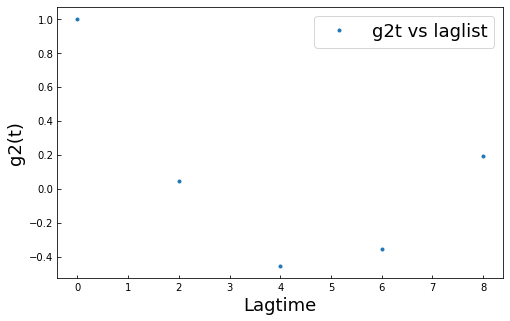

In [154]:
plt.figure(figsize=(8,5))
plt.plot(lagtime_g2t[0:50],average_g2t[0:50],'.')
plt.legend(['g2t vs laglist'], fontsize=18)
plt.xlabel("Lagtime",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
plt.tick_params(direction='in')

In [358]:
laglist_g2t=range(0,10,1)
px=[250,160] #[y,x]
g2t,intensity=compute_g2t(px,laglist_g2t,matrix)

Text(0, 0.5, 'g2(t)')

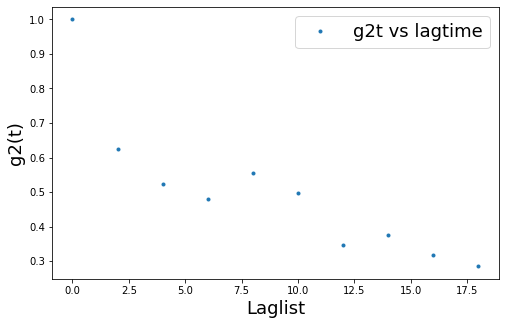

In [360]:
plt.figure(figsize=(8,5))
lagtime_g2t= [element * framespeed for element in laglist_g2t]
plt.plot(lagtime_g2t,np.array(g2t)/g2t[0],'.')
plt.legend(['g2t vs lagtime'], fontsize=18)
plt.xlabel("Laglist",fontsize=18)
plt.ylabel("g2(t)",fontsize=18)
#plt.xlim([0,lagtime_g2t[-1]])

## DSH

In [348]:
#info
kernel_size=20
laglist=list(range(1,10,1))
#test_ROI = [x,y,w,h]
testROI=None
tRange=None

In [349]:
## don't change please
def set_up_kernel(kernel_size):
    KernelSpecs = DSH.Kernel.Kernel()
    KernelSpecs.Initialize(shape=kernel_size, kernel_type='Gauss', params={'sigma':[kernel_size, kernel_size]}, padding=True)
    return KernelSpecs

def compute_correlation_maps(foldername, imgname, kernel, laglist, testROI=None, tRange=None):
    froot = os.path.join(foldername)
    fname = os.path.join(froot, imgname+'.raw')
    metadata_fname = os.path.join(froot, imgname+'.ini')
    
    mi_file = MI.MIfile(fname, metadata_fname)
    mi_file.OpenForReading()
    mi_file.Read(zRange=None, cropROI=None, closeAfter=False)
    mi_file.Close()
    
    position=str(testROI)+'_'+str(tRange)
    froot = os.path.join(foldername+imgname+'_'+position)
    #KernelSpecs.SetPadding(False)
    corrmap = CM.CorrMaps(mi_file, froot, laglist, kernel, imgRange=tRange, cropROI=testROI)
    
    cmap_list = corrmap.Compute(silent=False, return_maps=False)
    
def load_correlation_maps(foldername,imgname,testROI, tRange):
    froot = os.path.join(foldername+imgname+'_'+str(testROI)+'_'+str(tRange))
    corr_maps = CM.LoadFromConfig(os.path.join(froot, 'CorrMapsConfig.ini'), outFolder=froot)
    return corr_maps

In [350]:
kernel=set_up_kernel(kernel_size)
kernel_matrix=kernel.ToMatrix()

In [351]:
compute_correlation_maps(foldername, imgname, kernel, laglist, testROI, tRange)

Computing correlation maps:
  STEP 1: Loading images and computing average intensity...
  STEP 2: Computing contrast...
  STEP 3: Computing correlations...
     ...lag 1
     ...lag 2
     ...lag 3
     ...lag 4
     ...lag 5
     ...lag 6
     ...lag 7
     ...lag 8
     ...lag 9
Procedure completed in 67.5 seconds!


In [352]:
corr_maps=load_correlation_maps(foldername,imgname,testROI, tRange)

In [353]:
print(corr_maps)


|-----------------|
| CorrMaps class: |
|-----------------+---------------
| MI input        : <MIfile: 0+30x512x512x1 bytes>
| output folder   : /Users/wenyun/Desktop/20221017/10x_HSgel_405laser_0p26au_1000umheight_722gain17plaser_1min_8avg_None_None
| lag times (09)  : [1, 2, 3, 4, 5, 6, 7, 8, 9]
| image range     : [0, 30, 1]
| crop ROI        : None
| Kernel          : <Kernel [2D Gauss], 20x20, s=(20.0;20.0)>
|-----------------+---------------


In [354]:
loadtRange_tau = [0,20,1]
t_range_tau=range(0,20,1)
laglist_tau=list(range(1,10,1))
lagtime_tau= [element * framespeed for element in laglist_tau]

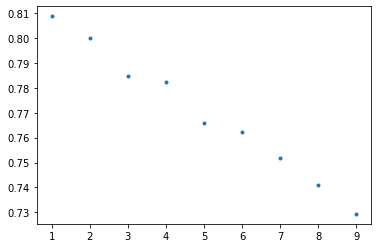

In [365]:
y=350

x=161
single_pixel_decay(y,x)

In [356]:
def avg_correlation_single_px(corr_maps,px,loadtRange,load_t_Range, laglist_fx,laglist_global): #return seconds
    px_corrmap=corr_maps.GetCorrTimetrace(px,zRange=loadtRange)
    average_tau=[]
    for tau in laglist_fx:
        tauidx=laglist_global.index(tau)+1
        sum=0
        for t in range(len(load_t_Range)):
            sum=sum+px_corrmap[tauidx,t]
        px_tau=sum/len(load_t_Range)
        average_tau.append(px_tau)
    return average_tau